## 📜 License

This notebook is licensed under the [MIT License](./LICENSE).  
© 2025 [@Z0G](https://github.com/Z0G). Feel free to use, modify, and share with proper attribution.

### Importing necessary libraries

In [1]:
!pip install prophet

import pandas as pd
import plotly.express as px
from prophet import Prophet

import plotly.io as pio
pio.renderers.default = 'colab'

### Importing dataset containing the historical data of GameStop for the last 5 years

In [3]:
df = pd.read_csv("GameStop.csv")

In [4]:
df

,Date,Close/Last,Volume,Open,High,Low
0,04/16/2025,$26.25,6292788,$26.45,$26.6635,$25.7201
1,04/15/2025,$26.70,6738083,$26.88,$27.38,$26.62
2,04/14/2025,$26.98,10628360,$26.66,$27.18,$25.68
3,04/11/2025,$26.40,10984060,$25.50,$26.44,$25.25
4,04/10/2025,$25.02,11545360,$25.00,$26.20,$24.41
...,...,...,...,...,...,...
1252,04/23/2020,$1.175,9063412,$1.1875,$1.2225,$1.145
1253,04/22/2020,$1.2225,10712532,$1.285,$1.2925,$1.2075
1254,04/21/2020,$1.195,16568200,$1.3075,$1.325,$1.19
1255,04/20/2020,$1.4025,24340044,$1.2125,$1.475,$1.195


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1257 non-null   object
 1   Close/Last  1257 non-null   object
 2   Volume      1257 non-null   int64 
 3   Open        1257 non-null   object
 4   High        1257 non-null   object
 5   Low         1257 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


### Cleaning the dataset

In [9]:
df['Close/Last'] = df['Close/Last'].str.replace('$', '', regex=False)
df['Volume'] = pd.to_numeric(df['Volume'])

df['Close/Last'] = pd.to_numeric(df['Close/Last'])

### Visualizing the dataset



In [10]:
px.area(df, x="Date", y="Close/Last")

In [11]:
px.line(df, x="Date", y="Close/Last")

In [12]:
px.area(df, x="Date", y="Volume")

In [13]:
px.bar(df, y="Volume")

In [14]:
px.box(df, y="Close/Last")

### Data preparation for Facebook Prophet model

In [15]:
columns = ['Date', 'Close/Last']
ndf = pd.DataFrame(df, columns=columns)

In [16]:
ndf

,Date,Close/Last
0,04/16/2025,26.2500
1,04/15/2025,26.7000
2,04/14/2025,26.9800
3,04/11/2025,26.4000
4,04/10/2025,25.0200
...,...,...
1252,04/23/2020,1.1750
1253,04/22/2020,1.2225
1254,04/21/2020,1.1950
1255,04/20/2020,1.4025


In [17]:
prophet_df = ndf.rename(columns={"Date": "ds", "Close/Last": "y"})

In [18]:
prophet_df

,ds,y
0,04/16/2025,26.2500
1,04/15/2025,26.7000
2,04/14/2025,26.9800
3,04/11/2025,26.4000
4,04/10/2025,25.0200
...,...,...
1252,04/23/2020,1.1750
1253,04/22/2020,1.2225
1254,04/21/2020,1.1950
1255,04/20/2020,1.4025


### Initializing and training the Facebook Prophet model

In [19]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsgrxrvoj/6f853do7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsgrxrvoj/mig4sbj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50334', 'data', 'file=/tmp/tmpsgrxrvoj/6f853do7.json', 'init=/tmp/tmpsgrxrvoj/mig4sbj7.json', 'output', 'file=/tmp/tmpsgrxrvoj/prophet_modele9upezr1/prophet_model-20250418041551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Creating a dataframe for the next 30 days for forecasting

In [20]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

### Forecasted data

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-17,-4.916033,-13.986085,1.606435,-4.916033,-4.916033,-1.223512,-1.223512,-1.223512,-1.250617,-1.250617,-1.250617,0.027105,0.027105,0.027105,0.0,0.0,0.0,-6.139545
1,2020-04-20,-4.743536,-13.863951,2.197719,-4.743536,-4.743536,-1.172914,-1.172914,-1.172914,-1.262172,-1.262172,-1.262172,0.089258,0.089258,0.089258,0.0,0.0,0.0,-5.916449
2,2020-04-21,-4.686036,-13.903330,2.262006,-4.686036,-4.686036,-1.087960,-1.087960,-1.087960,-1.169439,-1.169439,-1.169439,0.081479,0.081479,0.081479,0.0,0.0,0.0,-5.773997
3,2020-04-22,-4.628537,-13.411573,2.170249,-4.628537,-4.628537,-1.056518,-1.056518,-1.056518,-1.115415,-1.115415,-1.115415,0.058897,0.058897,0.058897,0.0,0.0,0.0,-5.685056
4,2020-04-23,-4.571038,-12.927880,1.510954,-4.571038,-4.571038,-1.357023,-1.357023,-1.357023,-1.379006,-1.379006,-1.379006,0.021982,0.021982,0.021982,0.0,0.0,0.0,-5.928062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,2025-05-12,32.323726,23.338844,38.407215,32.253029,32.397153,-1.405448,-1.405448,-1.405448,-1.262172,-1.262172,-1.262172,-0.143276,-0.143276,-0.143276,0.0,0.0,0.0,30.918278
1283,2025-05-13,32.358257,23.423600,39.038542,32.278699,32.438754,-1.099494,-1.099494,-1.099494,-1.169439,-1.169439,-1.169439,0.069945,0.069945,0.069945,0.0,0.0,0.0,31.258763
1284,2025-05-14,32.392788,23.523174,39.084498,32.300857,32.487772,-0.799947,-0.799947,-0.799947,-1.115415,-1.115415,-1.115415,0.315468,0.315468,0.315468,0.0,0.0,0.0,31.592841
1285,2025-05-15,32.427319,23.546013,39.100849,32.329313,32.529820,-0.787011,-0.787011,-0.787011,-1.379006,-1.379006,-1.379006,0.591994,0.591994,0.591994,0.0,0.0,0.0,31.640308


### Visualization of the forecasted data

In [22]:
px.line(forecast, x="ds", y="yhat")

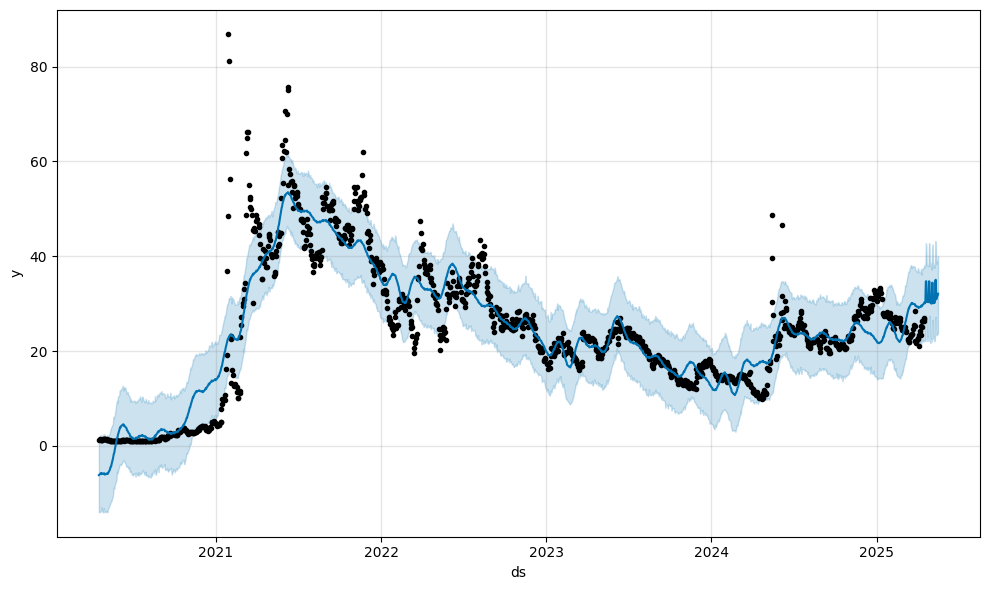

In [23]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

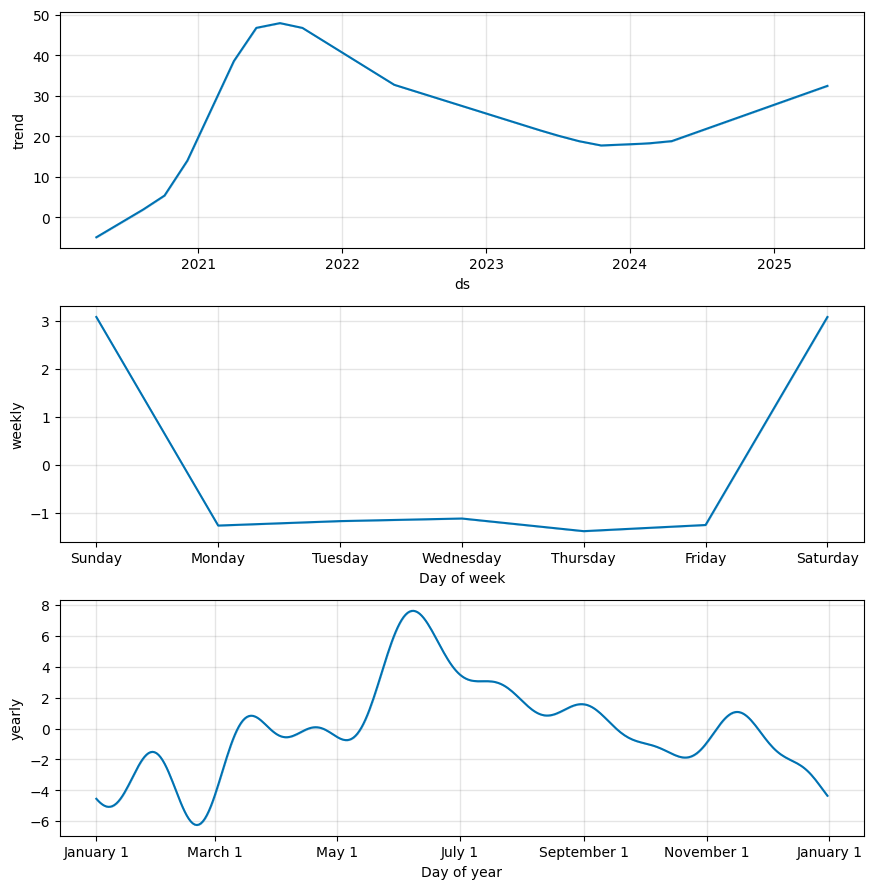

In [24]:
figure2 = m.plot_components(forecast)

### Downloading the forecast data

In [25]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>